# Упражнения на визуализацию данных

Задачи перенесены из курса [Введение в Data Science и машинное обучение](https://stepik.org/course/4852). Решения не являются эталонными. Главная цель – решить поставленную задачу.

**Задача**. Вам дан датасет с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

In [1]:
import pandas as pd
df = pd.read_csv('files/dataset_209770_6.txt', sep=' ')

<AxesSubplot:xlabel='x', ylabel='y'>

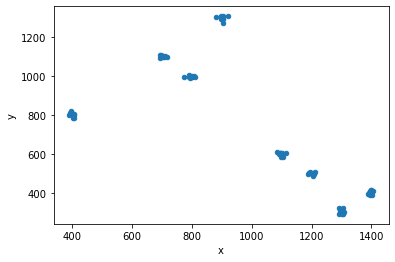

In [2]:
df.plot.scatter(x='x', y='y')

**Задача**. Данные `genome_matrix.csv` представляют геномные расстояния между видами. Постройте тепловую карту, чтобы различия было видно наглядно.

In [3]:
df = pd.read_csv('files/genome_matrix.csv', index_col = 0)

In [4]:
df

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [5]:
import seaborn as sns

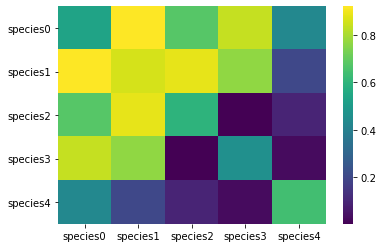

In [6]:
g = sns.heatmap(df, cmap="viridis")

**Задача** о героях из игры Dota 2. Посмотрите на распределение возможных ролей в игре (колонка roles в датасете `dota_hero_stats.csv`)

1. Определите, какая роль среди героев самая распространенная.
2. Постройте гистограмму, отражающую скольким героям сколько ролей приписывается и напишите какое число ролей у большинства героев.

In [7]:
roles = pd.read_csv('files/dota_hero_stats.csv', index_col = 0).roles

In [8]:
roles = roles.apply(eval)

In [9]:
list_of_roles = roles.tolist()

In [10]:
from itertools import chain
flat_roles =  chain.from_iterable(list_of_roles)

In [11]:
pd.Series(flat_roles).value_counts()

Disabler     86
Nuker        84
Carry        64
Initiator    53
Durable      47
Escape       47
Support      43
Pusher       29
Jungler      15
dtype: int64

<AxesSubplot:>

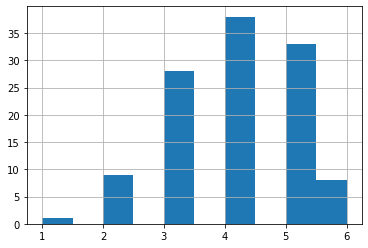

In [12]:
roles.apply(len).hist()

**Задача**. Магистрантка Адель решила изучить какие бывают ирисы (`iris.csv`). Помогите Адель узнать об ирисах больше – постройте их распределения и отметьте правильные утверждени. Распределение должно быть по всем образцам, без разделения на вид.

Варианты ответов:
- Petal width и petal length имеют унимодальное распределение
- Sepal width и sepal length имеют унимодальное распределение
- Petal length имеет наибольший размах значений
- Sepal width и sepal length имеют бимодальное распределение
- Petal width и petal length имеют бимодальное распределение

In [13]:
df = pd.read_csv('files/iris.csv', index_col=0)

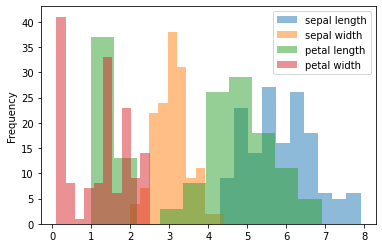

In [14]:
for column in df:
    if column != 'species':
        df[column].plot.hist(label=column,
                             legend=True,
                             alpha = 0.5)

**Задача**. Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

In [21]:
df = pd.read_csv("files/iris.csv", index_col = 0)

In [22]:
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


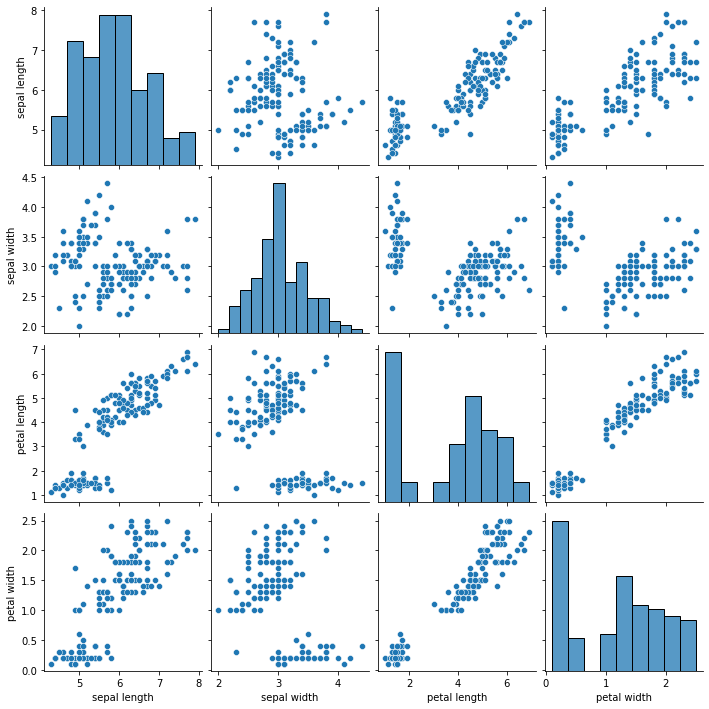

In [30]:
sns.pairplot(df.drop('species', axis=1))

In [38]:
df.drop('species', axis=1).corr().values

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])